### NOSS Selection for 2024 Academic year

In [42]:
# Data Analysis by Gabriel Baje
# Commenced on 9/1/2024

###### There are 10007 records for the dataset

###### The dataset includes the following columns:

- **INSTITUTION**: The name of the institution the candidate was selected to by NOSS
- **PROGRAMME**: The program in that institution the candidate was selected to.
- **SLF**: Candidates school leaver form SLF number
- **SURNAME**: Surname of candidate
- **FIRSTNAME**: First name of candidate
- **GENDER**: Sex of the candidate
- **SCHOOL**: School which candidate attended

In [1]:
# packages for houusing data
import pandas as pd
import numpy as np
# packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the .xlsx file as a pandas dataframe
noss = pd.read_excel('NOSS_2023_Results_for_Publication.xlsx')

In [3]:
# data types of the different columns
noss.dtypes

INSTITUTION               object
PROGRAMME                 object
Unnamed: 2                object
SLF                      float64
SURNAME     FIRSTNAME     object
Unnamed: 5                object
GENDER                    object
SCHOOL                    object
dtype: object

### Data Cleaning

In [4]:
# checking all columns for null values
noss.isna().sum()

INSTITUTION                 0
PROGRAMME                 372
Unnamed: 2               9697
SLF                       124
SURNAME     FIRSTNAME      62
Unnamed: 5               1239
GENDER                   1488
SCHOOL                      0
dtype: int64

In [5]:
# creating a variable to serve as a threshold for null values in a column
threshold =len(noss) * 0.05

In [6]:
# see which columns are less than the threshold, then these columns will have its null values removed from dataset
noss.isna().sum() < threshold

INSTITUTION               True
PROGRAMME                 True
Unnamed: 2               False
SLF                       True
SURNAME     FIRSTNAME     True
Unnamed: 5               False
GENDER                   False
SCHOOL                    True
dtype: bool

In [7]:
# dropping records with null values
noss.dropna(subset = ['INSTITUTION', 'PROGRAMME', 'SLF', 'SURNAME     FIRSTNAME', 'SCHOOL'],inplace=True)

In [8]:
# now we see that those columns have zero null values
noss.isna().sum()

INSTITUTION                 0
PROGRAMME                   0
Unnamed: 2               9201
SLF                         0
SURNAME     FIRSTNAME       0
Unnamed: 5                929
GENDER                   1054
SCHOOL                      0
dtype: int64

In [9]:
# creating a function to take the last letter of the 'surname firstname' column and inserting it as the gender because the dataset is messy
def gender_change(x):
    
    if pd.isnull(x['GENDER']):
        return x['SURNAME     FIRSTNAME'][-1]
    else:
        return x['GENDER']
        

In [10]:
# Adding the gender to the null values in the GENDER column
noss['GENDER'] = noss.apply(gender_change, axis=1)

In [ ]:
# These two columns ("Unnamed: 2" and "Unnamed: 5") do not hold any significant data and are errors, so they are removed.
noss.drop(columns=['Unnamed: 2', 'Unnamed: 5'], inplace=True)

In [14]:
# Checking the columns of the dataframe 
noss.columns

Index(['INSTITUTION', 'PROGRAMME', 'SLF', 'SURNAME     FIRSTNAME', 'GENDER',
       'SCHOOL'],
      dtype='object')

In [15]:
# Creating a column to specify whether the institution is a university or not
noss['University'] = noss['INSTITUTION'].apply(lambda x: True if 'university' in x.lower() else False)

### Data Analysis

In [16]:
# Counting the number of students selected for each institution in the dataframe
noss['INSTITUTION'].value_counts()

International Training Institute - Port Mo    956
International Training Institute - Lae Ca     900
University of Papua New Guinea                842
Papua New Guinea University of Techn          767
University of Goroka                          666
Datec Learning Center - Port Moresby          523
IBSUniversity                                 489
Acatech Aviation College                      440
Divine Word University - Madang camp          315
Don Bosco Technological Institute - DB        302
Madang Technical College                      243
Don Bosco Simbu Technical College             227
Sonoma Adventist College                      226
Pacific Adventist University                  222
Goroka Technical College                      210
National Polytechnic Institute of PNG         191
Port Moresby Technical College                174
PNG University of Natural Resources a         161
Mount Hagen Technical College                 160
Kokopo Business College                       155


In [20]:
# creating a list of the top five universities in PNG
top_5 = ['University of Papua New Guinea', 'Papua New Guinea University of Techn','University of Goroka', 'Divine Word University - Madang camp', 'Pacific Adventist University']

In [21]:
# the data in terms of gender is still messy, so this will filter only the rows with 'M' or 'F'
condition = noss['GENDER'].isin(['M', 'F'])

In [22]:
noss = noss[condition]

In [23]:
# subsetting the dataframe to have only rows for the top five universities in PNG
noss_by_uni = noss[noss['INSTITUTION'].isin(top_5)]

In [24]:
# the number of students selected to the top five universities
noss_by_uni['INSTITUTION'].value_counts()

University of Papua New Guinea          842
Papua New Guinea University of Techn    767
University of Goroka                    543
Divine Word University - Madang camp    315
Pacific Adventist University            222
Name: INSTITUTION, dtype: int64

In [213]:
#The number of records in the dataset after cleaning
len(noss)

9207

M    0.547192
F    0.452808
Name: GENDER, dtype: float64


Text(0.5, 1.0, 'Gender distribution in the NOSS selection data')

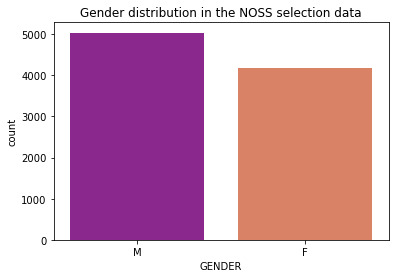

In [25]:
print(noss['GENDER'].value_counts(normalize=True))

sns.countplot(x=noss['GENDER'], palette= 'plasma')
plt.title('Gender distribution in the NOSS selection data')

In [26]:
#The distribution of the top ten institutions with most intakes in terms of percentage
round(noss['INSTITUTION'].value_counts(normalize=True).head(10)*100, 2)

International Training Institute - Port Mo    10.38
International Training Institute - Lae Ca      9.78
University of Papua New Guinea                 9.15
Papua New Guinea University of Techn           8.33
University of Goroka                           5.90
Datec Learning Center - Port Moresby           5.68
IBSUniversity                                  4.65
Acatech Aviation College                       4.14
Divine Word University - Madang camp           3.42
Don Bosco Technological Institute - DB         3.28
Name: INSTITUTION, dtype: float64

Text(0.5, 1.0, 'The top ten institutions with the most selected students ')

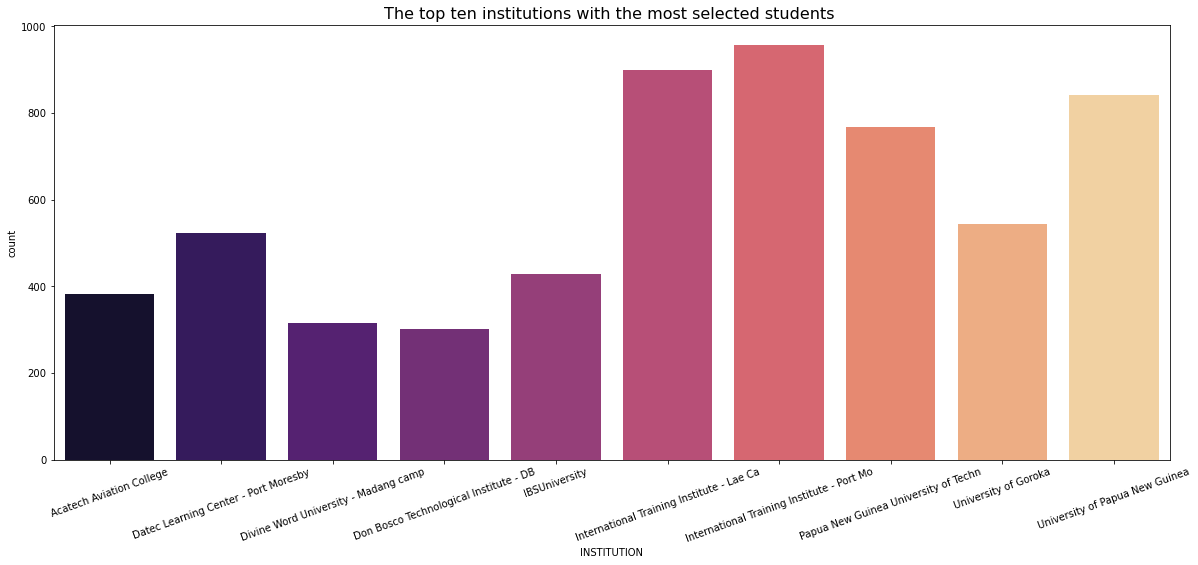

In [30]:
top_ten = noss['INSTITUTION'].value_counts().head(10).index

noss_top_ten = noss[noss['INSTITUTION'].isin(top_ten)]

plt.figure(figsize=(20,8))
plt.xticks(rotation = 20, fontsize=10)

sns.countplot(data = noss_top_ten, x='INSTITUTION', palette='magma')
plt.title('The top ten institutions with the most selected students ', fontdict={'fontsize': 16}, )

Text(0.5, 1.0, 'The distribution of Gender in the top ten institutions with the most selected students')

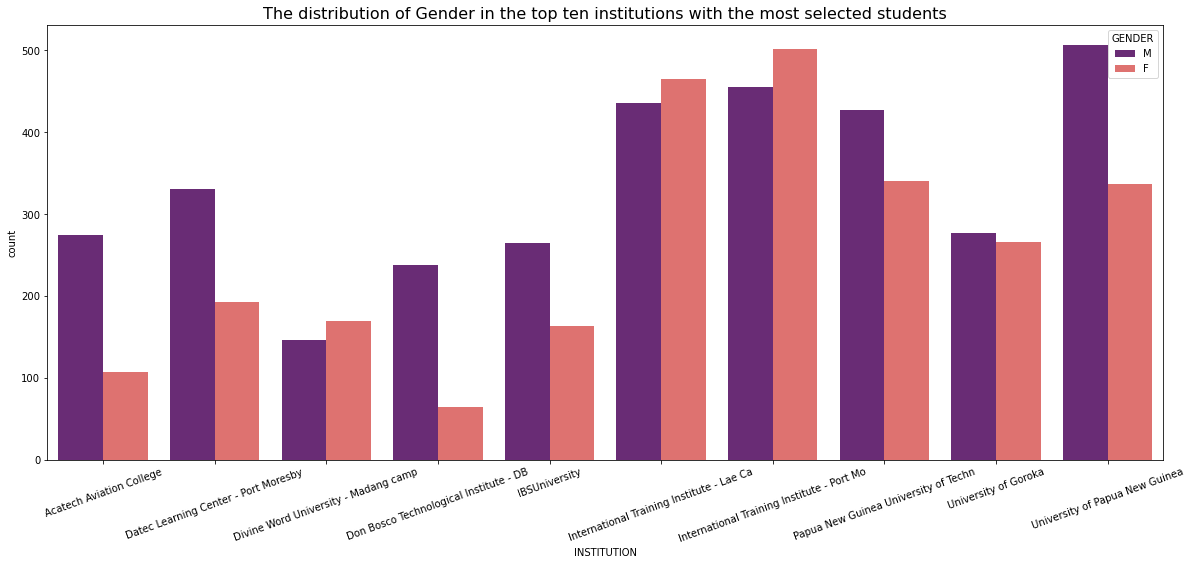

In [31]:
plt.figure(figsize=(20,8))
plt.xticks(rotation = 20, fontsize=10)
sns.countplot(data = noss_top_ten, x='INSTITUTION', hue='GENDER', palette='magma')
plt.title('The distribution of Gender in the top ten institutions with the most selected students', fontdict={'fontsize': 16})

In [32]:
# The programs with the most number of students selected to
noss_top_ten['PROGRAMME'].value_counts().head(10)

NON-TESAS: Diploma in Aircraft Maintenance Engineering    283
Business & Management Foundation Year                     260
Science Foundation Year                                   225
NON TESAS: Diploma in Management                          220
Diploma in Business Accounting                            220
Diploma in Business Management                            220
Diploma in Information Communication & Technology         220
NON TESAS: Diploma in Accounting                          220
NON TESAS: Diploma in Human Resource Management           220
NON TESAS: Diploma in Information Technology              220
Name: PROGRAMME, dtype: int64

In [33]:
# the programmes with the most number of males and females respectively
noss_by_gender = noss.groupby(['GENDER', 'PROGRAMME']).size().reset_index(name = 'Count')

programme_for_females = noss_by_gender[noss_by_gender['Count'] == noss_by_gender['Count'].max()]

noss_by_gender_male = noss_by_gender[noss_by_gender['GENDER']=='M']

programme_for_males = noss_by_gender_male[noss_by_gender_male['Count'] == noss_by_gender_male['Count'].max()]
print(programme_for_females)
print(programme_for_males)

   GENDER                    PROGRAMME  Count
73      F  Diploma in Business Studies    244
    GENDER                                          PROGRAMME  Count
315      M  NON-TESAS: Diploma in Aircraft Maintenance Eng...    203


In [35]:
# the programme with the most number of selected students 
noss_by_in_pro = noss.groupby(['INSTITUTION', 'PROGRAMME']).size().reset_index(name = 'Count')

noss_by_in_pro[noss_by_in_pro['Count']== noss_by_in_pro['Count'].max()]

,INSTITUTION,PROGRAMME,Count
0,Acatech Aviation College,NON-TESAS: Diploma in Aircraft Maintenance Eng...,283


In [39]:
# creating a column for TESAS programs (True or False)
noss['TESAS'] = noss['PROGRAMME'].apply(lambda x: False if 'tesas' in x.lower() else True)

In [40]:
# filtering the dataset to have only TESAS programs based on the column created above
noss_tesas = noss[noss['TESAS']==True]

In [41]:
# TESAS programmes wiith the most number of selections
noss_tesas['PROGRAMME'].value_counts().head(5)

Diploma in Business Studies              445
Diploma in Primary Teaching              369
Business & Management Foundation Year    260
Diploma in Business Accounting           233
Diploma in Business Management           229
Name: PROGRAMME, dtype: int64

In [42]:
# tesas programme with the most number of males
noss_tesas_male = noss_tesas[noss_tesas['GENDER']=='M']

noss_tesas_male['PROGRAMME'].value_counts()

Diploma in Business Studies                                                  201
Diploma in Primary Teaching                                                  199
Business & Management Foundation Year                                        158
Science Foundation Year                                                      146
TTC Vehicle Trade                                                            121
                                                                            ... 
STAT-P REQUIRED! Bachelor of Education (Secondary-Science)                     1
Bachelor of Arts (Social and Religious Studies)                                1
National Certificates in Metal Fabrication & Welding                           1
STAT-P REQUIRED! Bachelor of Science (Environmental Science and Mathemati      1
STAT-P REQUIRED! Diploma of Business Accounting (Pre-service)                  1
Name: PROGRAMME, Length: 172, dtype: int64

In [43]:
# the data is quite messy here
# the programmes offered in the top five universities with the most number of students selected
noss_by_uni['PROGRAMME'].value_counts().head(5)

Business & Management Foundation Year                           260
Science Foundation Year                                         225
STAT-P REQUIRED!                                                187
STAT-P REQUIRED! Bachelor of Science Education (Pre-service)     88
STAT-P REQUIRED! Bachelor of Business in Accountancy             80
Name: PROGRAMME, dtype: int64

Text(0.5, 1.0, 'The distribution of gender in the top five universities in PNG')

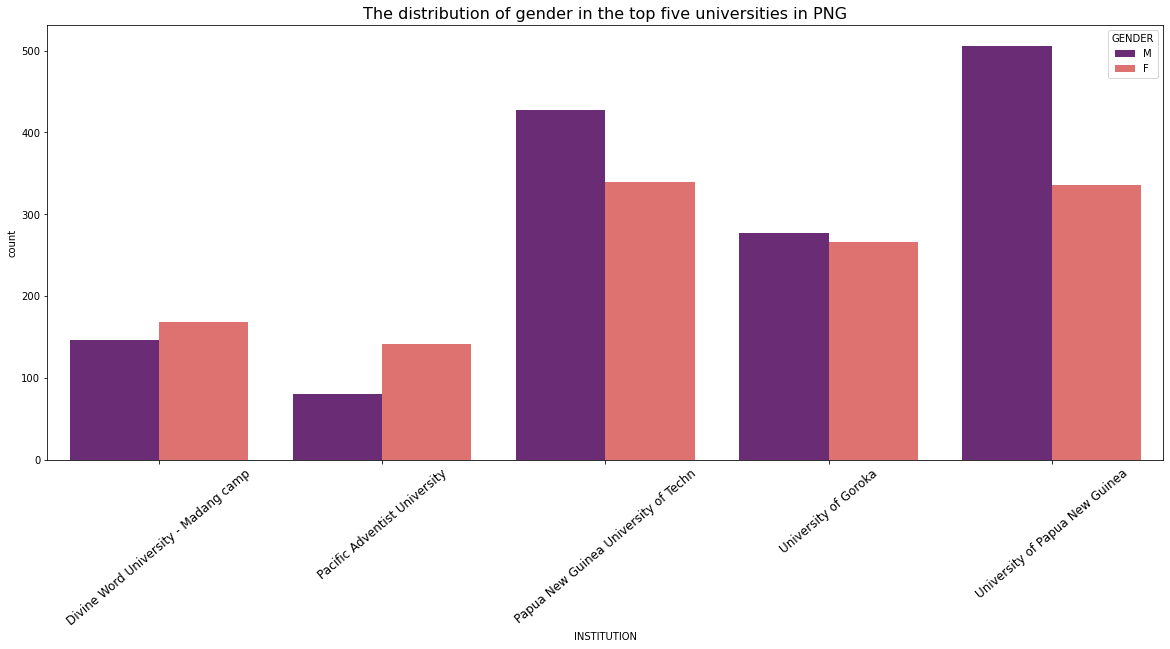

In [44]:
# distibution of gender with respect to the top five universities in PNG
plt.figure(figsize= (20,8))
plt.xticks(rotation = 40, fontsize=12)
sns.countplot(data = noss_by_uni, x='INSTITUTION', hue='GENDER', palette= 'magma')
plt.title('The distribution of gender in the top five universities in PNG', fontdict = {'fontsize': 16})

In [54]:
#The distribution of genders in UPNG and UOT
noss_upng = noss_by_uni[noss_by_uni['INSTITUTION']=='University of Papua New Guinea']
noss_uot = noss_by_uni[noss_by_uni['INSTITUTION']=='Papua New Guinea University of Techn']

print('University of Papua New Guinea\n', round(noss_upng['GENDER'].value_counts(normalize=True)*100), 2)
print('PNG University of Technology\n',  round(noss_uot['GENDER'].value_counts(normalize=True*100),2))

University of Papua New Guinea
 M    60.0
F    40.0
Name: GENDER, dtype: float64 2
PNG University of Technology
 M    0.56
F    0.44
Name: GENDER, dtype: float64


In [52]:
# the 10 seconday/high schools with the most number of selected students to the top five universities in PNG
noss_by_uni['SCHOOL'].value_counts().head(10)

Port Moresby National High               168
Sogeri National School of Excellence     150
Mt. Hagen Secondary                      126
Aiyura National High                     119
Busu Secondary                            99
Kerevat National School of Excellence     97
Lae Secondary                             91
Passam National High                      82
Wawin National School of Excellenceee     79
Goroka Secondary School                   75
Name: SCHOOL, dtype: int64

In [53]:
# the five secondary/high schools with the most number of selected students to tertiary institutions
noss['SCHOOL'].value_counts().head(5)

Mt. Hagen Secondary                     308
Goroka Secondary School                 266
Sogeri National School of Excellence    232
Port Moresby National High              225
Lae Secondary                           220
Name: SCHOOL, dtype: int64